<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [25]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

#### Read the dataset in the csv file from the URL


In [28]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [30]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


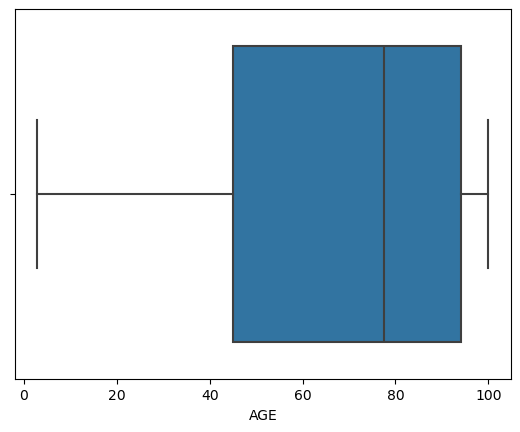

In [31]:
ax = sns.boxplot(x='AGE', data=boston_df)
plt.show()

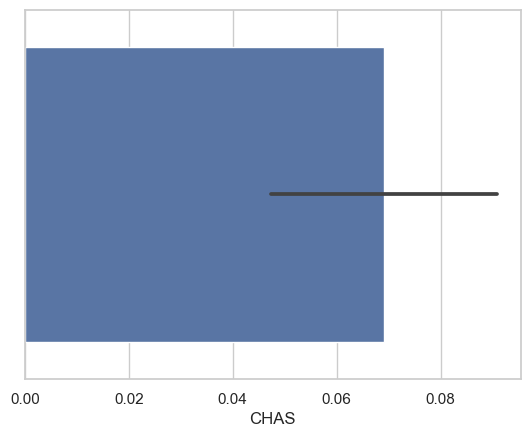

In [61]:
sns.set(style="whitegrid")
ax = sns.barplot(x="CHAS", data=boston_df)
plt.show()

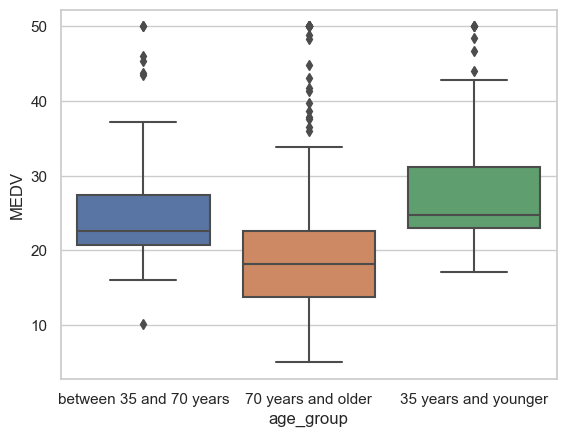

In [71]:
boston_df.loc[(boston_df["AGE"]<=35),"age_group"] = "35 years and younger"
boston_df.loc[(boston_df["AGE"]>35)&(boston_df["AGE"]<70),"age_group"]="between 35 and 70 years"
boston_df.loc[(boston_df["AGE"]>=70),"age_group"]="70 years and older"
sns.set(style="whitegrid")
ax = sns.boxplot(x="age_group", y="MEDV", data=boston_df)

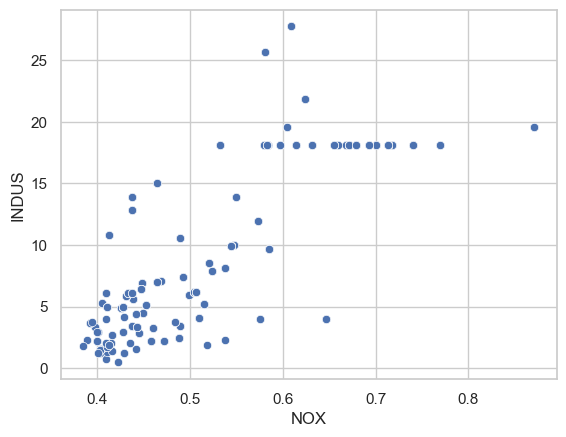

In [85]:
ax = sns.scatterplot(x='NOX',y="INDUS",data=boston_df)
plt.show()

C:\Users\Davut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


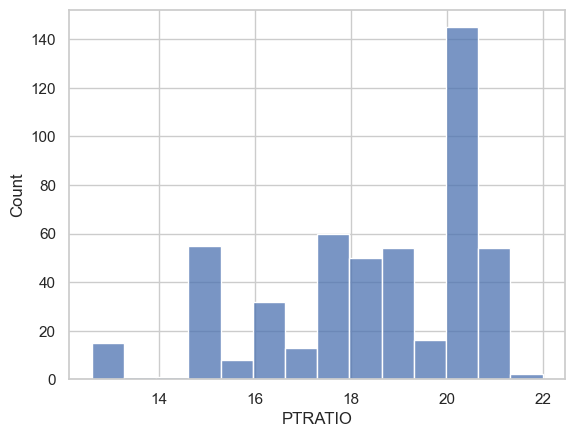

In [89]:
ax = sns.histplot(x='PTRATIO',data=boston_df)
plt.show()

In [91]:
## X is the input variables (or independent variables)
X = boston_df['MEDV']
## y is the target/dependent variable
y = boston_df['CHAS']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CHAS   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     15.97
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           7.39e-05
Time:                        20:29:28   Log-Likelihood:                -16.144
No. Observations:                 506   AIC:                             36.29
Df Residuals:                     504   BIC:                             44.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0399      0.029     -1.354      0.176      -0.098       0.018
MEDV           0.0048      0.001      3.996      0.000       0.002       0.007
==============================================================================
Omnibus:                      353.684   Durbin-Watson:                   1.156
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2621.933
Skew:                           3.251   Prob(JB):                         0.00
Kurtosis:                      12.060   Cond. No.                         64.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df        sum_sq      mean_sq         F        PR(>F)
age_group    2.0   5401.731883  2700.865942  36.40765  1.710501e-15
Residual   503.0  37314.563532    74.184023       NaN           NaN


In [103]:
pearson_corr = boston_df[['NOX', 'INDUS']].corr(method='pearson')

print("Pearson Correlation Coefficient Matrix:")
print(pearson_corr)

Pearson Correlation Coefficient Matrix:
            NOX     INDUS
NOX    1.000000  0.763651
INDUS  0.763651  1.000000


In [105]:
from statsmodels.formula.api import ols
lm = ols('DIS ~ age_group', data = boston_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df       sum_sq     mean_sq           F        PR(>F)
age_group    2.0  1112.474663  556.237331  248.323988  9.611803e-76
Residual   503.0  1126.702981    2.239966         NaN           NaN
